<a href="https://colab.research.google.com/github/jalcuevag/estadistica-grupal/blob/main/Actividad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,  cross_val_score
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


from sklearn.model_selection import GridSearchCV


In [2]:
const = 'https://raw.githubusercontent.com/jalcuevag/regression/main/concrete.csv'
dataset_reg = pd.read_csv(const)
dataset_reg.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
dataset_reg.shape

(1030, 9)

In [4]:
dataset_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
dataset_reg.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
y = dataset_reg['csMPa']
X = dataset_reg.drop('csMPa',axis=1)

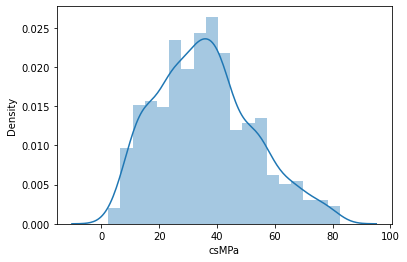

In [7]:
sns.distplot(y)

<Figure size 864x720 with 0 Axes>

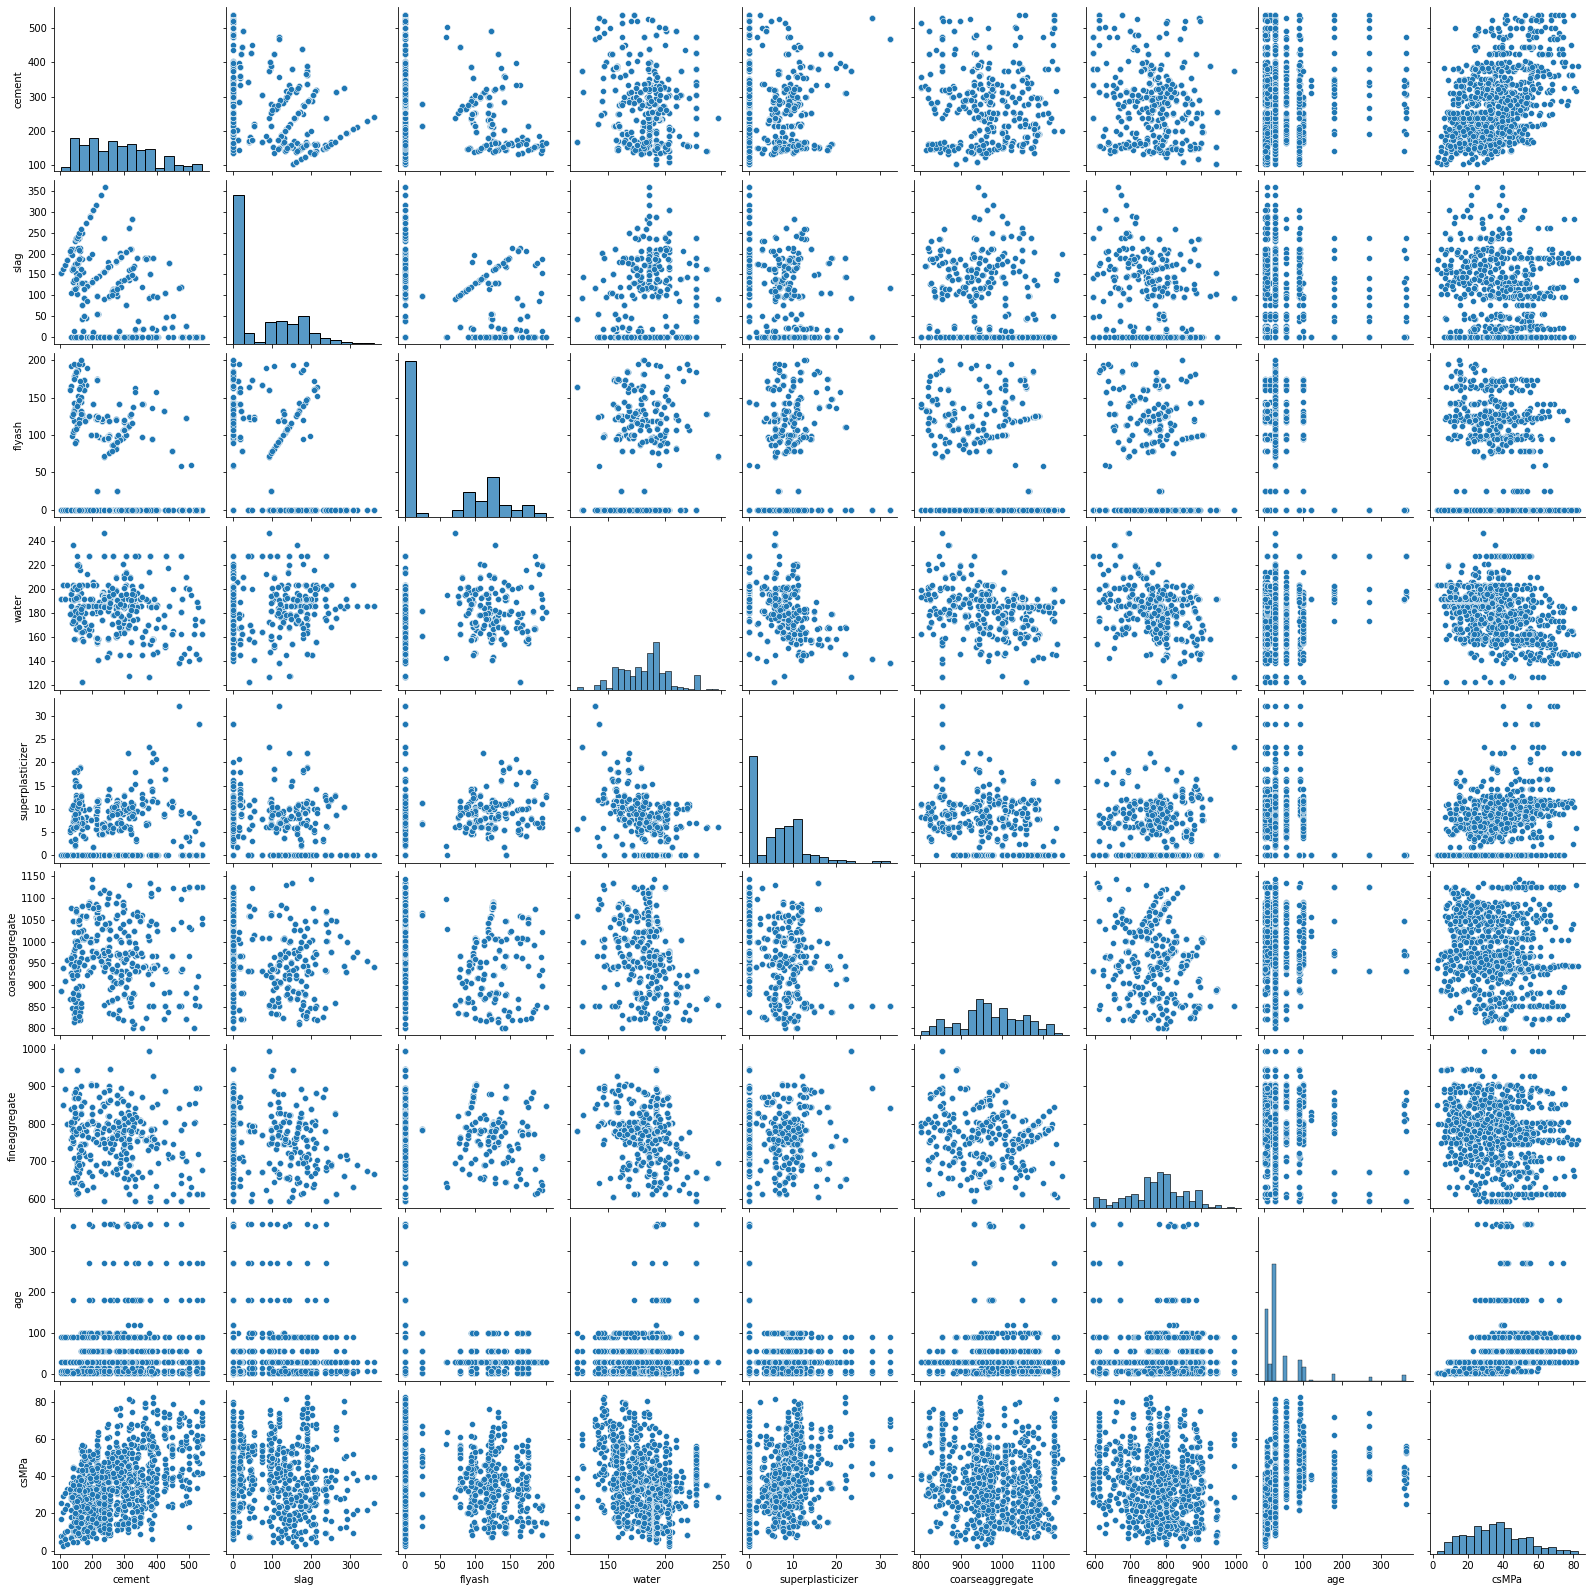

In [8]:
plt.figure(figsize=(12,10))
sns.pairplot(dataset_reg)

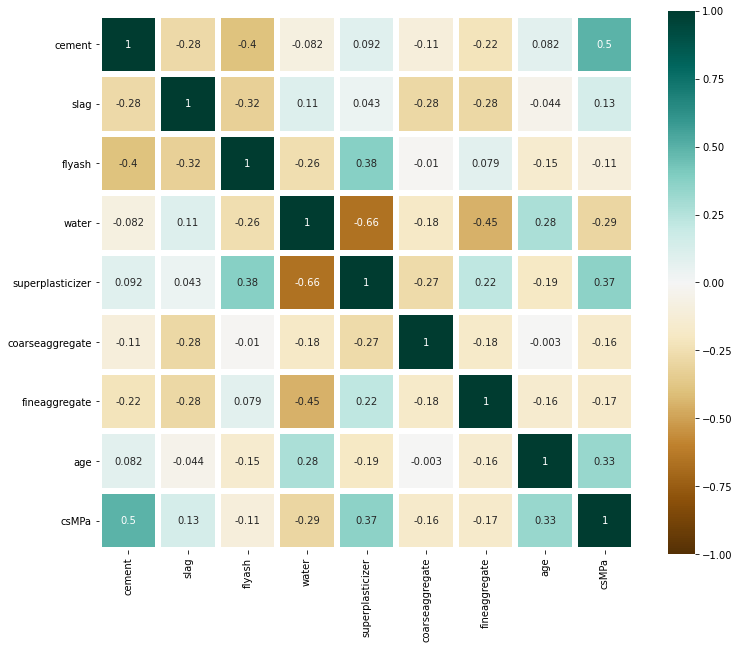

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset_reg.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='BrBG',linewidths=5)

In [10]:
dataset_reg.var()

cement              10921.580220
slag                 7444.124812
flyash               4095.616541
water                 456.002651
superplasticizer       35.686781
coarseaggregate      6045.677357
fineaggregate        6428.187792
age                  3990.437729
csMPa                 279.081814
dtype: float64

In [11]:
model = Lasso()


X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.25, random_state=1, shuffle=True)


In [12]:
model.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
model.score(X_validation,Y_validation)

0.5562539312138057

In [14]:
model.coef_

array([ 0.12542327,  0.10750979,  0.09408969, -0.14392455,  0.28115747,
        0.01556767,  0.0187091 ,  0.11640379])

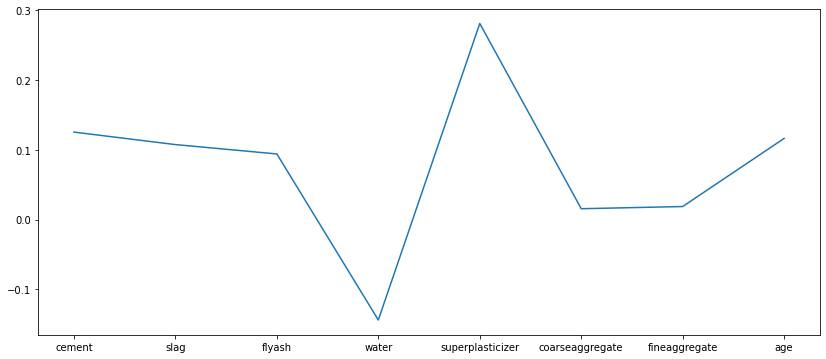

In [15]:
plt.rcParams["figure.figsize"] = [14,6]
plt.plot(model.coef_)
plt.xticks(np.arange(8),list(X.columns));

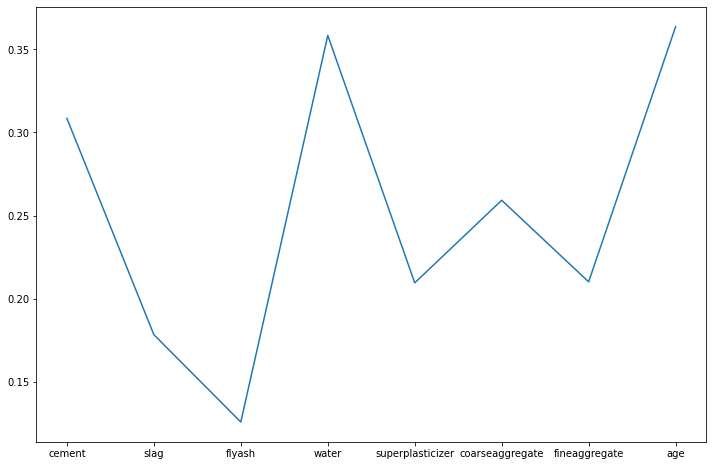

In [16]:
best_features = SelectKBest(mutual_info_regression, k=4)
best_features.fit(X,y)

scores = best_features.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(8),list(X.columns));

In [19]:
X2 = ['cement','slag','superplasticizer','coarseaggregate','fineaggregate', 'age']
X3 = ['cement','water','coarseaggregate', 'age']

In [20]:
X2_train, X2_validation, y2_train, y2_validation = X_train[X2], X_validation[X2], Y_train, Y_validation
X3_train, X3_validation, y3_train, y3_validation = X_train[X3], X_validation[X3], Y_train, Y_validation

In [21]:
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,Y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
print(model1.score(X_validation,Y_validation))
print(model2.score(X2_validation,y2_validation))
print(model3.score(X3_validation,y3_validation))

0.5562539312138057
0.500242627431787
0.45797129306103346


Linear regression: 0.617877
Dession tree: 0.796794
Lasso: 0.617824
Ridge: 0.617877
Gradient boost regressor: 0.900052


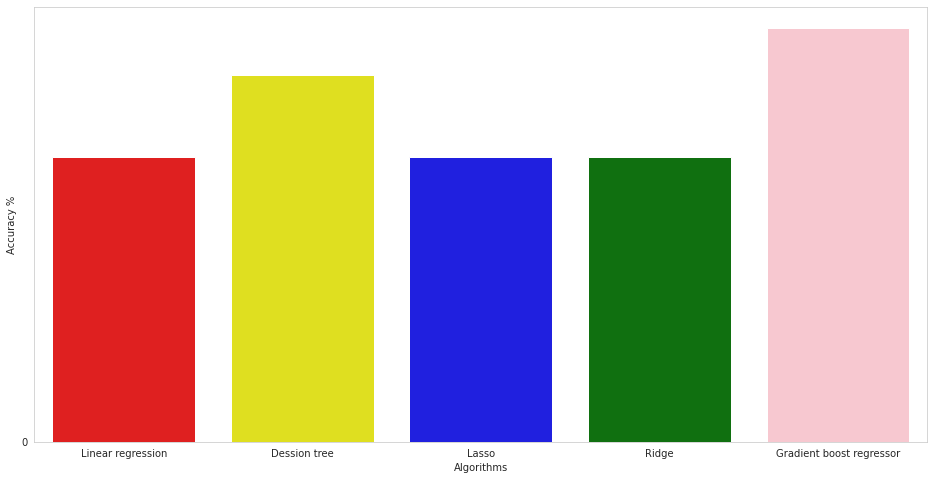

In [24]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()


models = []
models.append(('Linear regression', LinearRegression()))
models.append(('Dession tree', DecisionTreeRegressor()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('Gradient boost regressor', GradientBoostingRegressor()))


results = []
names = []
cv = KFold(10, random_state = 1)
for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, cv=cv, scoring='r2').mean()
  results.append(cv_results)
  names.append(name)
  print('%s: %f' % (name, cv_results))


colors = ["red", "yellow", "blue", "green", "pink"]

sns.set_style("whitegrid")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(names), y=list(results), palette=colors )
plt.show()

In [30]:
param_test1 = {'n_estimators': [230],
              'max_depth': range(10,31,2), 
              'min_samples_split': range(50,501,10), 
              'learning_rate':[0.2]}

gbregressor = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                        param_grid = param_test1, scoring='r2', 
                        cv=5)
gbregressor.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...None,
                       

In [31]:
gbregressor.best_estimator_
print("R Squared:",gbregressor.best_score_)

R Squared: 0.9341028531107043


In [36]:
cross_val_score(gbregressor.best_estimator_, X_train, Y_train, 
                cv=cv, scoring='r2').mean()

0.9337601459893735

In [49]:
regression_model_score = cross_val_score(gbregressor.best_estimator_, 
                                         X_validation , Y_validation , 
                                         cv=cv, scoring='r2').mean()
regression_model_score

0.8417138131865606

In [53]:
prediction_regressor = gbregressor.predict(X_validation).flatten()

RED NEURONAL

In [68]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [61]:
model_neuronal = build_model()

In [62]:
history = model_neuronal.fit(
  X_train, Y_train,
  epochs=100, validation_split = 0.2, verbose=0)

In [63]:
model_neuronal.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [64]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,val_loss,val_mse,epoch
95,5.402936,48.226368,7.375071,91.334282,95
96,5.383257,46.962490,8.572196,122.554825,96
97,5.366210,48.614799,5.443624,50.399261,97
98,5.369823,47.697914,8.741778,124.499611,98
99,5.518444,53.163326,5.842362,63.709969,99


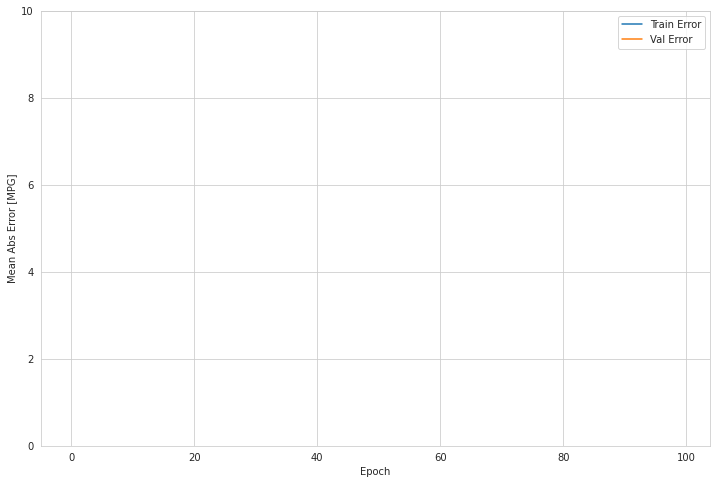

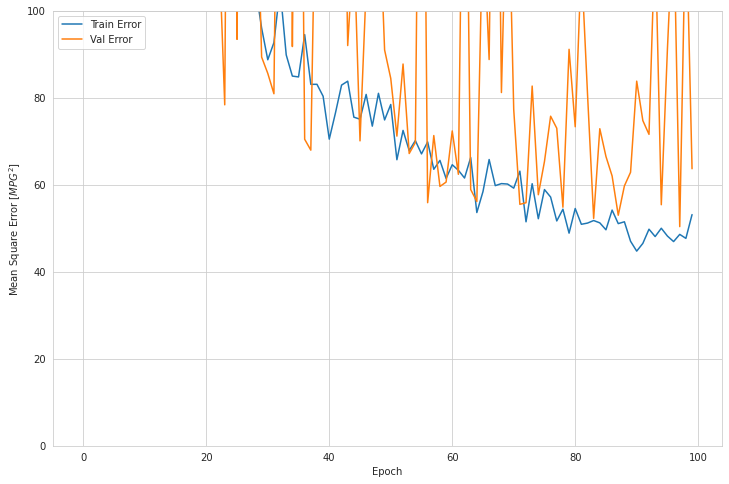

In [67]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0, 10])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0, 100])
  plt.legend()
  plt.show()


plot_history(history)

In [45]:
loss, mae, mse = model_neuronal.evaluate(X_validation, Y_validation, verbose=2)

9/9 - 0s - loss: 34.0622 - mae: 4.1014 - mse: 34.0622


In [56]:
test_predictions = model_neuronal.predict(X_validation).flatten()


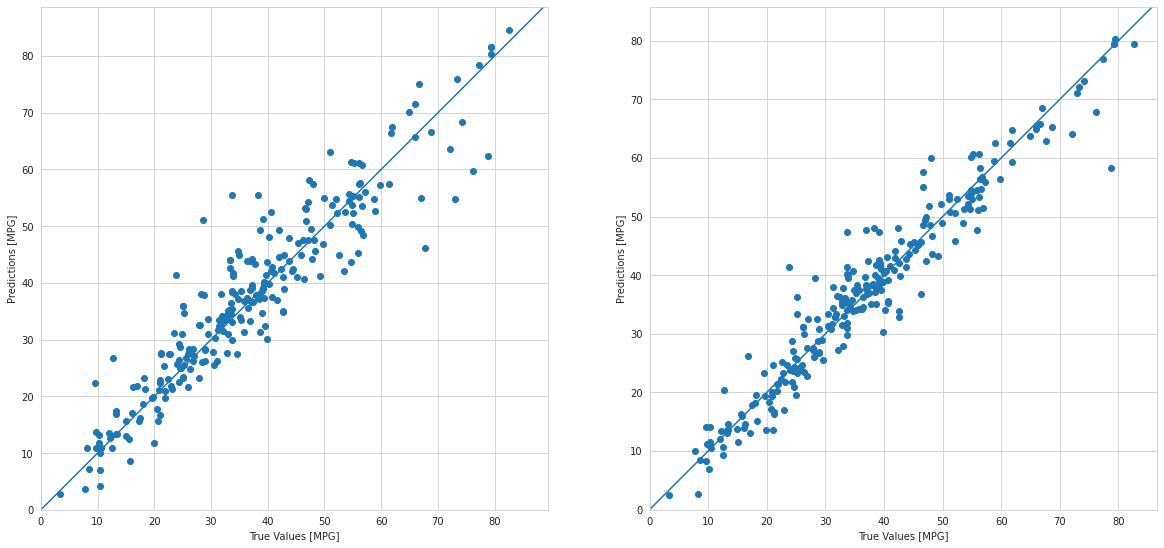

In [58]:
plt.figure(figsize=(20,30))
plt.subplot(122)
plt.scatter(Y_validation, prediction_regressor)
plt.xlabel('True Values - ')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.subplot(121)
plt.scatter(Y_validation, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
